<a href="https://colab.research.google.com/github/zakariafaouzi/MachineLearning/blob/main/Meteo(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('meteo.csv')
df.head()

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,...,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,1,2010,6,1,0,0,13.45,77.88,1015.76,0.1,...,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,True
1,3,2010,6,3,0,0,14.27,83.58,1016.39,0.0,...,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,False
2,5,2010,6,5,0,0,19.88,66.58,1018.18,0.0,...,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,True
3,7,2010,6,7,0,0,19.31,72.00,1013.60,0.4,...,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,True
4,9,2010,6,9,0,0,22.06,74.29,1005.01,2.0,...,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,False


In [ ]:
features_dropped = ['Unnamed: 0', 'Year', 'Month', 'Day', 'Hour', 'Minute']
df = df.drop(features_dropped, axis=1)
df.head()

,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,Sunshine.Duration.daily.sum..sfc.,...,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,13.45,77.88,1015.76,0.1,0.0,65.04,33.12,36.88,45.08,350.81,...,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,True
1,14.27,83.58,1016.39,0.0,0.0,80.95,31.62,10.83,80.54,68.66,...,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,False
2,19.88,66.58,1018.18,0.0,0.0,0.00,0.00,0.00,0.00,891.68,...,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,True
3,19.31,72.00,1013.60,0.4,0.0,49.69,24.12,24.33,49.25,666.70,...,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,True
4,22.06,74.29,1005.01,2.0,0.0,58.77,48.42,54.67,22.17,400.71,...,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,False


In [ ]:
df.head()

,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,Sunshine.Duration.daily.sum..sfc.,...,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,13.45,77.88,1015.76,0.1,0.0,65.04,33.12,36.88,45.08,350.81,...,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,True
1,14.27,83.58,1016.39,0.0,0.0,80.95,31.62,10.83,80.54,68.66,...,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,False
2,19.88,66.58,1018.18,0.0,0.0,0.00,0.00,0.00,0.00,891.68,...,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,True
3,19.31,72.00,1013.60,0.4,0.0,49.69,24.12,24.33,49.25,666.70,...,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,True
4,22.06,74.29,1005.01,2.0,0.0,58.77,48.42,54.67,22.17,400.71,...,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,False


In [ ]:
df_features = df.drop('pluie.demain', axis=1)
df_target = df[['pluie.demain']]

print("Les features de mon problème sont: ", list(df_features.columns))
print("Le target de mon problème sont: ", list(df_target.columns))

Les features de mon problème sont:  ['Temperature.daily.mean..2.m.above.gnd.', 'Relative.Humidity.daily.mean..2.m.above.gnd.', 'Mean.Sea.Level.Pressure.daily.mean..MSL.', 'Total.Precipitation.daily.sum..sfc.', 'Snowfall.amount.raw.daily.sum..sfc.', 'Total.Cloud.Cover.daily.mean..sfc.', 'High.Cloud.Cover.daily.mean..high.cld.lay.', 'Medium.Cloud.Cover.daily.mean..mid.cld.lay.', 'Low.Cloud.Cover.daily.mean..low.cld.lay.', 'Sunshine.Duration.daily.sum..sfc.', 'Shortwave.Radiation.daily.sum..sfc.', 'Wind.Speed.daily.mean..10.m.above.gnd.', 'Wind.Direction.daily.mean..10.m.above.gnd.', 'Wind.Speed.daily.mean..80.m.above.gnd.', 'Wind.Direction.daily.mean..80.m.above.gnd.', 'Wind.Speed.daily.mean..900.mb.', 'Wind.Direction.daily.mean..900.mb.', 'Wind.Gust.daily.mean..sfc.', 'Temperature.daily.max..2.m.above.gnd.', 'Temperature.daily.min..2.m.above.gnd.', 'Relative.Humidity.daily.max..2.m.above.gnd.', 'Relative.Humidity.daily.min..2.m.above.gnd.', 'Mean.Sea.Level.Pressure.daily.max..MSL.', 'Me

In [ ]:
print("Les features size: ", len(list(df_features.columns)))


Les features size:  40


# Apply ACP Frm scratch

In [ ]:
A = (df_features - df_features.mean(axis=0)) / df_features.std(axis=0)

C = (A.T @ A)/(len(A)-1)

eigenvalues, eigenvectors = np.linalg.eig(C)

Variance = eigenvalues/np.sum(eigenvalues)
print(Variance)

[3.25372853e-01 1.36759829e-01 1.08884481e-01 6.10543583e-02
 4.96606812e-02 4.68797763e-02 3.30250160e-02 3.01449172e-02
 2.74334150e-02 2.34428508e-02 2.25938223e-02 1.65830321e-02
 1.56135570e-02 1.43125986e-02 1.34937205e-02 1.16900092e-02
 9.30109886e-03 8.73280278e-03 5.70457661e-03 5.00949454e-03
 4.68968340e-03 3.94934241e-03 3.68995332e-03 3.49446721e-03
 2.92792175e-03 2.84745856e-03 2.56750103e-03 1.70539190e-03
 1.55827524e-03 1.43351198e-03 6.12623101e-05 8.37479986e-05
 1.15353215e-03 1.00954449e-03 1.95536989e-04 7.71520024e-04
 6.28424873e-04 4.78440149e-04 4.94482821e-04 5.67110796e-04]


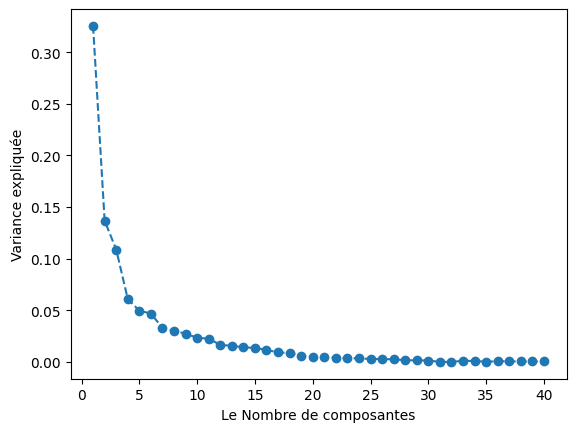

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 41, 1), Variance, '--o')
plt.xlabel("Le Nombre de composantes")
plt.ylabel("Variance expliquée")
plt.show()

In [ ]:
pca_2 = eigenvectors[:, :2]

In [ ]:
# Je vais choisir les 2 premières composantes
#projections_k = A@pca_2
projections_k = np.dot(A, pca_2)
projections_k

array([[ 0.30605341, -2.26280529],
       [-0.09694896, -2.42458717],
       [ 5.8083355 ,  1.62120784],
       ...,
       [-2.1774082 ,  0.4835104 ],
       [ 2.63426424, -0.88969361],
       [ 5.89799741,  2.22920156]])

In [ ]:
principal_data = pd.DataFrame(projections_k, columns=['PCA1', 'PCA2'])
principal_data

,PCA1,PCA2
0,0.306053,-2.262805
1,-0.096949,-2.424587
2,5.808335,1.621208
3,0.926811,-1.247909
4,0.345104,-1.623608
...,...,...
1239,3.596443,-2.251433
1240,1.411576,-2.699979
1241,-2.177408,0.483510
1242,2.634264,-0.889694


In [ ]:
principal_data = pd.concat([principal_data, df_target], axis=1)
principal_data

,PCA1,PCA2,pluie.demain
0,0.306053,-2.262805,True
1,-0.096949,-2.424587,False
2,5.808335,1.621208,True
3,0.926811,-1.247909,True
4,0.345104,-1.623608,False
...,...,...,...
1239,3.596443,-2.251433,False
1240,1.411576,-2.699979,True
1241,-2.177408,0.483510,False
1242,2.634264,-0.889694,True


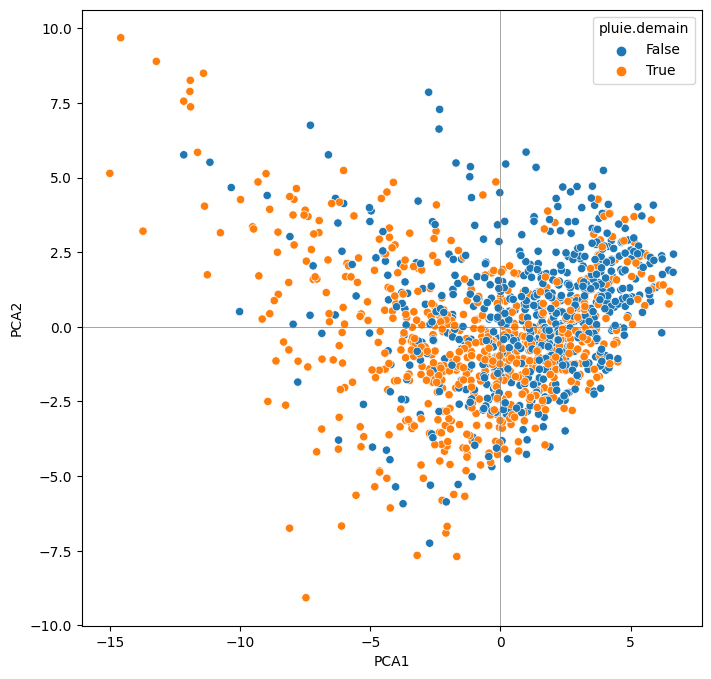

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(principal_data, x = 'PCA1', y='PCA2', hue='pluie.demain')
plt.axhline(linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.show()

In [ ]:
colonnes = {colonne: "x" + str(df_features.columns.get_loc(colonne)) for colonne in df_features.columns}
colonnes

{'Temperature.daily.mean..2.m.above.gnd.': 'x0',
 'Relative.Humidity.daily.mean..2.m.above.gnd.': 'x1',
 'Mean.Sea.Level.Pressure.daily.mean..MSL.': 'x2',
 'Total.Precipitation.daily.sum..sfc.': 'x3',
 'Snowfall.amount.raw.daily.sum..sfc.': 'x4',
 'Total.Cloud.Cover.daily.mean..sfc.': 'x5',
 'High.Cloud.Cover.daily.mean..high.cld.lay.': 'x6',
 'Medium.Cloud.Cover.daily.mean..mid.cld.lay.': 'x7',
 'Low.Cloud.Cover.daily.mean..low.cld.lay.': 'x8',
 'Sunshine.Duration.daily.sum..sfc.': 'x9',
 'Shortwave.Radiation.daily.sum..sfc.': 'x10',
 'Wind.Speed.daily.mean..10.m.above.gnd.': 'x11',
 'Wind.Direction.daily.mean..10.m.above.gnd.': 'x12',
 'Wind.Speed.daily.mean..80.m.above.gnd.': 'x13',
 'Wind.Direction.daily.mean..80.m.above.gnd.': 'x14',
 'Wind.Speed.daily.mean..900.mb.': 'x15',
 'Wind.Direction.daily.mean..900.mb.': 'x16',
 'Wind.Gust.daily.mean..sfc.': 'x17',
 'Temperature.daily.max..2.m.above.gnd.': 'x18',
 'Temperature.daily.min..2.m.above.gnd.': 'x19',
 'Relative.Humidity.daily.m

In [ ]:
df_features = df_features.rename(columns = colonnes)
df_features

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39
0,13.45,77.88,1015.76,0.1,0.0,65.04,33.12,36.88,45.08,350.81,...,100,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24
1,14.27,83.58,1016.39,0.0,0.0,80.95,31.62,10.83,80.54,68.66,...,100,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24
2,19.88,66.58,1018.18,0.0,0.0,0.00,0.00,0.00,0.00,891.68,...,0,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72
3,19.31,72.00,1013.60,0.4,0.0,49.69,24.12,24.33,49.25,666.70,...,100,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72
4,22.06,74.29,1005.01,2.0,0.0,58.77,48.42,54.67,22.17,400.71,...,100,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,21.53,69.00,1013.72,2.1,0.0,52.79,4.25,8.92,49.12,516.51,...,100,0,7.49,0.51,8.31,0.72,7.70,0.36,8.64,1.08
1240,22.84,70.79,1009.35,5.4,0.0,53.77,58.83,46.75,23.58,421.18,...,100,0,13.48,0.80,16.08,0.72,17.06,2.19,18.00,5.76
1241,15.96,76.00,1012.38,0.6,0.0,80.54,27.79,12.04,80.54,135.13,...,100,1,24.29,7.15,29.99,15.32,35.39,20.01,28.08,15.12
1242,19.58,61.54,1015.81,0.0,0.0,49.96,41.50,48.62,7.38,619.00,...,100,0,17.02,0.72,17.73,0.72,19.45,4.02,16.92,4.32


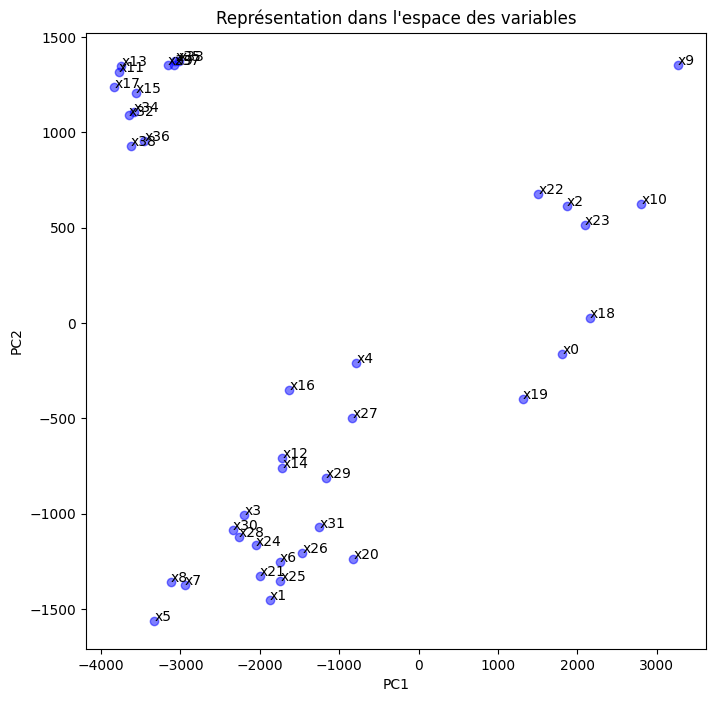

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


projection_variable_pc1 = np.dot(A.T, principal_data['PCA1'])
projection_variable_pc2 = np.dot(A.T, principal_data['PCA2'])


plt.figure(figsize=(8, 8))
plt.scatter(projection_variable_pc1, projection_variable_pc2, c='blue', alpha=0.5)

for i, variable in enumerate(df_features.columns):
    plt.text(projection_variable_pc1[i], projection_variable_pc2[i], variable)


plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title("Représentation dans l'espace des variables")

plt.show()


# Avec sklearn

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(df_features)
df_features_standarized = scaler.transform(df_features)
df_features_standarized

array([[ 0.1725127 ,  0.68282791, -0.15761893, ..., -0.56513177,
        -0.40190099, -0.45640905],
       [ 0.2881431 ,  1.28819015, -0.07846455, ..., -0.75049763,
        -0.35439839, -0.45640905],
       [ 1.07922428, -0.51727618,  0.14643438, ..., -0.87920144,
        -0.90067825, -0.79316638],
       ...,
       [ 0.52645455,  0.48316458, -0.58228841, ...,  0.69924151,
        -0.09313411,  1.13116122],
       [ 1.03692048, -1.05254384, -0.15133683, ..., -0.59508171,
        -0.82942435, -0.31208448],
       [ 1.32317623, -0.6893265 ,  0.79977205, ..., -0.63312623,
        -0.75817046, -0.26397629]])

In [ ]:
apply_pca = PCA(n_components=40)
apply_pca.fit(df_features_standarized)


Variances = apply_pca.explained_variance_ratio_
print(Variances)

[3.25372853e-01 1.36759829e-01 1.08884481e-01 6.10543583e-02
 4.96606812e-02 4.68797763e-02 3.30250160e-02 3.01449172e-02
 2.74334150e-02 2.34428508e-02 2.25938223e-02 1.65830321e-02
 1.56135570e-02 1.43125986e-02 1.34937205e-02 1.16900092e-02
 9.30109886e-03 8.73280278e-03 5.70457661e-03 5.00949454e-03
 4.68968340e-03 3.94934241e-03 3.68995332e-03 3.49446721e-03
 2.92792175e-03 2.84745856e-03 2.56750103e-03 1.70539190e-03
 1.55827524e-03 1.43351198e-03 1.15353215e-03 1.00954449e-03
 7.71520024e-04 6.28424873e-04 5.67110796e-04 4.94482821e-04
 4.78440149e-04 1.95536989e-04 8.37479986e-05 6.12623101e-05]


In [ ]:
len(apply_pca.explained_variance_ratio_)

40

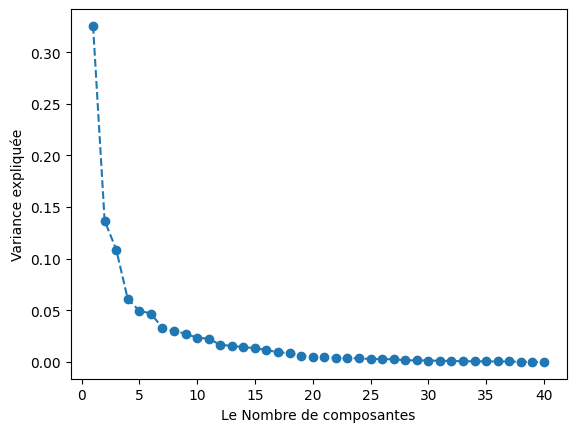

In [ ]:
import matplotlib.pyplot as plt


plt.plot(range(1, 41, 1), Variances, 'o--')
plt.xlabel("Le Nombre de composantes")
plt.ylabel("Variance expliquée")
plt.show()